In [1]:
%matplotlib notebook
import pylab
pylab.rcParams['figure.figsize'] = (10., 10.)

from sklearn.linear_model import Lasso, Ridge
from sklearn import datasets

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Generate data that would be prone to overfitting, e.g., N = D
np.random.seed(2)
N = 2000
D = 2000

# Generate sparse true linear model, good for applying Lasso
X = np.random.randn(N, D)
Dnz = 50
w = np.zeros(D)
wnz = np.random.choice(D, Dnz, replace=False)
w[wnz] = np.random.randn(Dnz)

sigma = 1
y = np.dot(X, w) + np.random.randn(N) * sigma


n_train = int(0.8 * N)
n_valid = N - n_train

X_train = X[:n_train, :]
y_train = y[:n_train]
X_valid = X[n_train:, :]
y_valid = y[n_train:]

In [5]:
n_lambdas = 15
lambdas = np.logspace(-5, 2, n_lambdas)

train_losses = []
valid_losses = []

lasso = Lasso(fit_intercept=False)
for (i, lam) in enumerate(lambdas):
    lasso.set_params(alpha=lam)
    lasso.fit(X_train, y_train)
    yhat_train = lasso.predict(X_train)
    yhat_valid = lasso.predict(X_valid)
    train_losses.append(np.mean((yhat_train - y_train)**2))
    valid_losses.append(np.mean((yhat_valid - y_valid)**2))

/home/varunk/ml-stuff/anaconda2/envs/tensorflow/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)


<IPython.core.display.Javascript object>


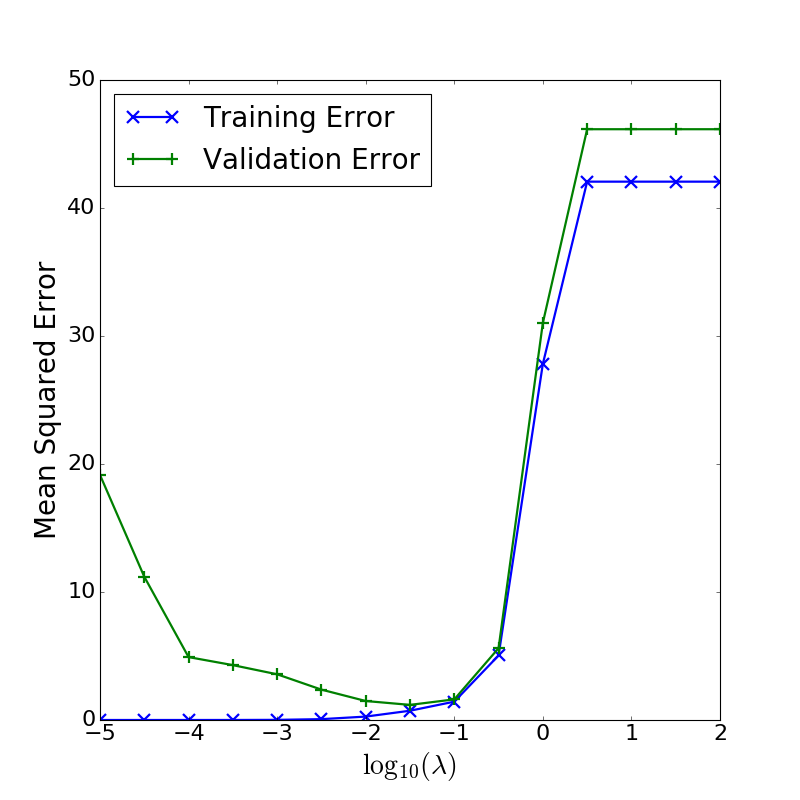

In [6]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.tick_params(axis='both', labelsize=20)
ax.set_xlabel('$\log_{10}(\lambda)$', fontsize=25)
ax.set_ylabel('Mean Squared Error', fontsize=25)
ax.plot(np.log10(lambdas), train_losses, marker='x', markersize=10, lw=2, markeredgewidth='2', label='Training Error')
ax.plot(np.log10(lambdas), valid_losses, marker='+', markersize=10, lw=2, markeredgewidth='2', label='Validation Error')
ax.legend(loc='upper left', fontsize=25)